In [1]:
from functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config Completer.use_jedi = False
%matplotlib inline
font = {'size': 15}

In [2]:
#import degli spettri puri
pure_material_names,pure_materials=import_pure_spectra('../data/raw/Database Raman/BANK_LIST.dat','../data/raw/Database Raman/')

# Exploratory data analysis

## Spettri puri
Andiamo prima di tutto a vedere come sono fatti gli spettri dei materiali puri che, come capiamo subito, sono molto meno rumorosi rispetto agli spettri del nostro campione. 

Di seguito plottiamo come esempio lo **spettro puro dell'Albite**. 

Notiamo come lo spettro è poco rumoroso e non presenti offset significativi inoltre lontano dalle frequenze di assorbimento degli stati rotazionali/vibrazionali delle molecole lo spettro va a zero. 



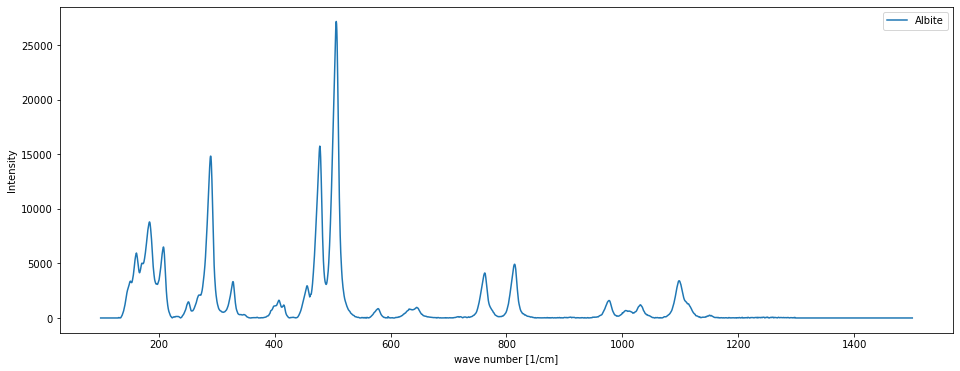

In [3]:
raman_plot()
plt.plot(pure_materials.Albite_wn,pure_materials.Albite_I)
plt.legend(['Albite']);
plt.rc('font',**font)

Vogliamo ora comparare diversi spettri puri per imparare il più possibile l'andamento delle curve Raman. Notiamo che gli spettri raman dei materiali puri non sono normalizzati tra di loro. 

Dato che l'area sotto lo spettro risulta proporzionale al tempo di esposizione della misura (fonte: pdf di introduzione), questa non è una quantità a cui siamo interessati, scegliamo di normalizzare in modo che tutti gli spettri abbiamo area unitaria. Il seguente è il risultato.

![pure normalized spectrums.](./figures/pure_normalized_specrtums.png)

Notiamo che nessuno degli spettri puri presenta un rumore rilevante, assumiamo dunque che questi spettri rappresentino gli spettri Raman corretti per i materiali nella lista.

Assumiamo inoltre che i materiali puri dati coprano quelli di cui sono composti i nostri campioni incogniti (anche se questo non fosse vero è sufficente che coprano i materiali principali).

Osservando il grafico appena plottato deduciamo che:

1. **Per numeri d'onda superiori a 1230 $cm^{-1}$ (linea arancione verticale) tutti gli spettri Raman non presentano picchi rilevanti, l'intensità a piccole lunghezze d'onda è nulla.**
2. **Gli spettri Raman, relativamente alle altezze dei picchi, non presentano un offset rilevante. Nella coda del grafico tutti gli spettri Raman vanno a zero.**
3. **Le FWHM dei picchi sono, certe volte, importanti: fino a 100 $cm^{-1}$.**
4. **Lo spettro fino a circa 1230 $cm^{-1}$ è densamente popolato.**

## Spettri incogniti
### Con cosa stiamo lavorando?
Andiamo a vedere come sono gli **spettri sperimentali**, abbiamo visto che gli spettri con rumore di fondo non contengono informazioni ulteriori rispetto a quelli a background rimosso, dunque non li prendiamo in considerazione. Ne plottiamo alcuni (i primi) e poi tutti per capire con cosa stiamo lavorando.

![first spectrums.](./figures/first_spectrums.png)

![all spectrums.](./figures/all_spectrums.png)

Da questi grafici prendiamo le seguenti scelte nel trattare i dati.

- **Rimozione dell'offset**

Come abbiamo visto dagli spettri puri, diversamente dagli spettri incogniti nessuno spettro presentava un offset rilevante. Per eliminare/ridurre questo offset utilizziamo il fatto che l'intensita' di tutti gli spettri puri per wave number > 1230 $cm^{-1}$ va a zero. Imponiamo dunque questo constrain agli spettri incogiti per rimuovere l'offset (calcoliamo l'offset sulla coda e lo sottraiamo a tutto lo spettro). 

- **Scegliamo di eliminare la parte destra del grafico**

Questo perchè, come si vede dagli spettri puri, non abbiamo picchi oltre alla frequenza di soglia fissata a $1230 cm^{-1}$.

- **Normalizzazione degli spettri del sample**

Normalizziamo in fine i dati per poterli confrontare.

- **Eliminazione degli spettri "non fisici"**

Se questa opzione è stata selezionata gli spettri non fisici, selezionati utilizzando un bound sull'intensità massima della coda, vengono messi a zero, clusterizzati a parte e non utilizzati nel calcolo delle abbondanze.

## Risultato dell'EDA
Importiamo i dati elaborati come spiegato (utilizzando make) e vediamo il risultato.

In [4]:
data = pd.read_csv('../repo_raman/data/EDA_processed_data.csv')
names=define_names() #definisce il nome degli spettri del campione
data.head()

,Unnamed: 0,wn,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,...,r11c2,r11c3,r11c4,r11c5,r11c6,r11c7,r11c8,r11c9,r11c10,r11c11
0,0,184.0,0.000122,-0.000049,0.000013,-0.000187,-0.000671,0.000211,-0.000324,-0.000249,...,-0.000006,-0.000423,-0.000198,0.000305,-0.000390,-0.000500,-0.000695,-0.000037,0.001651,-0.000216
1,1,185.0,0.000233,-0.000053,0.000068,0.000087,-0.000473,-0.000043,-0.000280,0.000052,...,-0.000120,-0.000454,-0.000166,0.000226,-0.000245,-0.000269,-0.000348,-0.000044,0.001599,-0.000244
2,2,186.0,0.000247,-0.000060,0.000095,0.000141,-0.000425,-0.000121,-0.000294,0.000105,...,-0.000170,-0.000462,-0.000152,0.000195,-0.000199,-0.000233,-0.000275,-0.000063,0.001599,-0.000261
3,3,187.0,0.000202,-0.000074,0.000169,0.000141,-0.000353,-0.000173,-0.000351,0.000062,...,-0.000275,-0.000453,-0.000117,0.000149,-0.000158,-0.000237,-0.000261,-0.000062,0.001636,-0.000314
4,4,188.0,0.000015,-0.000101,0.000338,-0.000003,-0.000251,-0.000137,-0.000501,-0.000218,...,-0.000490,-0.000412,-0.000038,0.000080,-0.000149,-0.000351,-0.000415,-0.000017,0.001756,-0.000448


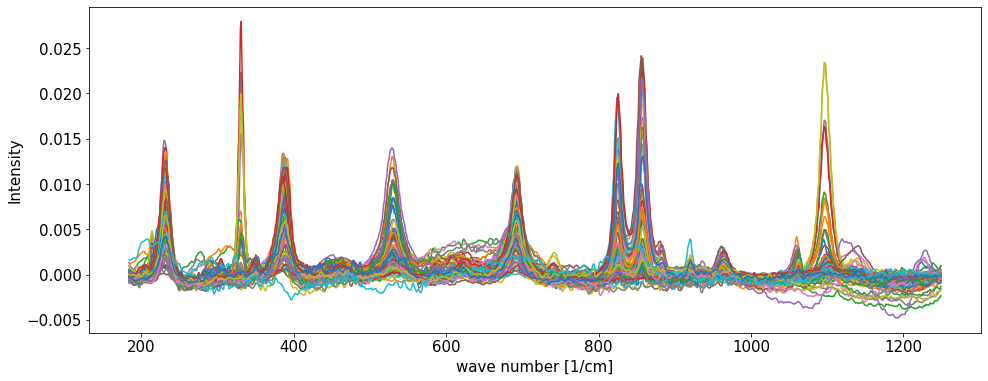

In [5]:
raman_plot()
plt.rc('font',**font)
for temp in names[1:]:
    plt.plot(data.wn,data[temp])

# Clustering
La prcedura qui è ben spiegata in modo dettagliato nei notebooks utilizzati per sviluppare il progetto (in './notebooks/CLUSTERING.ipynb'). Per il motivo che le altezze dei picchi, come i materiali, variano in modo continuo, abbiamo scelto di utilizzare l'algoritmo Kmeans. In questo modo abbiamo cluster utili a identificare materiali abbastanza diversi (la definizione di cluster non è univoca quì, dato che le abbondanze variano in modo continuo).

Ci concentriamo ora su due aspetti:

1. **Capire se la clusterizzazione correla con la posizione**
2. **Generare dei centroidi dei cluster che permettono di eliminare il rumore sugli spettri, senza alterare troppo i picchi**

## Il risultato del clustering correla con la posizione?
Vogliamo ora capire se esiste una correlazione spaziale nella cluserizzazione. Questo corrispondde al chiedersi se punti vicini hanno materiali simili. Per fare ciò sceglaimo di utilizzare un basso numero di cluster (5), in modo di poter avere una corrispondenza visiva su una griglia $11x11$. **Questa scelta equivale a ritenere uguali materiali con abbondanze piuttosto diverse.** 

Di seguito il risultato del clustering con KMeans (#cluster=5).

![correlation_cluster.](./figures/correlation_clusters.png)

### Definizione di correlazione spaziale
Per descrivere in modo quantitativo la correlazione utilizziamo il coeficiente di Moran (vedi definizione alla [pagina Wikipedia](https://en.wikipedia.org/wiki/Moran%27s_I)). La metrica che utilizziamo è un *nearest neighbour*. Di seguito degli esempi che spiegano in modo pratico questo indice.
### Esempi
**Esempio con una matrice Random 11x11 (P($\in$cluster)=$\frac{1}{2}$)**

Un esempio di cluster completamente random, notare come il coeficiente di Morange sia circa 0 (in questo caso -0.036). 

![example1.](./figures/example1.png)

**Esempio di alta correlazione: metà reticolo nel cluster(10x5), metà no (10x5)**

Quì un esempio di un cluster evidentemente molto correlato spazialmente, notare come il coeficiente di Morange è vicino a 1 (0.90).

![example2.](./figures/example2.png)

**Esempio di alta correlazione: caso in cui il cluster è piccolo**

Notiamo qui infine che il coeficiente di Morange tende a uno anche nel caso di un cluster piccolo e compatto (correlato spazialmente). Vogliamo evidenziare qui che questo coeficiente non dipende dal numero di punti nel cluster rispetto al numero di punti del reticolo. Anche in questo caso il coeficiente di morange è tendente a 1 (0.75).

![example3.](./figures/example3.png)

### Coeficiente di Morane per i nostri cluster
Andiamo a calcolare i coefficienti di Morange per i nostri cluster. Chiaramente ne dobbiamo calcolare uno per cluster. I coefficienti di Moran sono scritti nelle labels.

Negli spettri dati come esempio questi coefficienti sono vicini allo zero, non è evidenziata alcuna correlazione particolare. Questo si capisce anche da un impatto visivo con la figura.

![correlation_grid.](./figures/correlation_grid.png)

## Utilizziamo i centroidi per effettuare i FIT ai materiali puri
### Come scegliamo il numero di cluster?
Vogliamo utilizzare la clasterizzazione per rimuovere il rumore dagli spettri, mediando sul cluster (utilizzando i centroidi).

Per scegliere il numero di cluster andiamo a vedere come varia l'errore della clusterizzazione al variare del numero di cluster(attributo "inertia" della classe KMeans). 

Come abbiamo visto a lezione ci aspettiamo una zona a decrescenza rapida e una a decrescenza più lenta, vogliamo lavorare sul ginocchio di questa curva. Abbiamo posto come stop un bound alla decrescita dell'errore sui cluster (0.001). Di seguito la curva di decrescità dell'errore in funzione del numero di cluster, con il punto scelto utilizzando il nostro bound.

![number_cluster.png.](./figures/number_cluster.png)

Questo è il risultato della clusterizzazione con il numero di cluster mostarto sopra.

![FIT_cluster.](./figures/FIT_cluster.png)

Di questo clustering teniamo i centroidi, con i quali fitteremo gli spettri puri (questo ci è utile per rimuovere il rumore di fondo). Di seguito importiamo e plottiamo i centroidi generati dalla clusterizzazione automatizzata con make. 

In [6]:
#import dei pesi dei cluster
labels=np.loadtxt("../repo_raman/data/CLUSTERING_labels.txt")
# import dei centroidi
del data
data = pd.read_csv("../repo_raman/data/CLUSTERING_data_centres.csv")
data.drop(labels='Unnamed: 0',inplace=True,axis=1)
data.head()

,wn,0,1,2,3,4,5,6
0,184.0,-0.000096,0.000261,-0.000245,-0.000177,-0.000214,-0.000042,-0.000079
1,185.0,-0.000116,0.000163,-0.000248,-0.000216,-0.000168,-0.000041,0.000072
2,186.0,-0.000141,0.000122,-0.000258,-0.000233,-0.000163,-0.000049,0.000101
3,187.0,-0.000173,0.000056,-0.000274,-0.000247,-0.000159,-0.000062,0.000125
4,188.0,-0.000220,-0.000060,-0.000304,-0.000251,-0.000159,-0.000085,0.000123


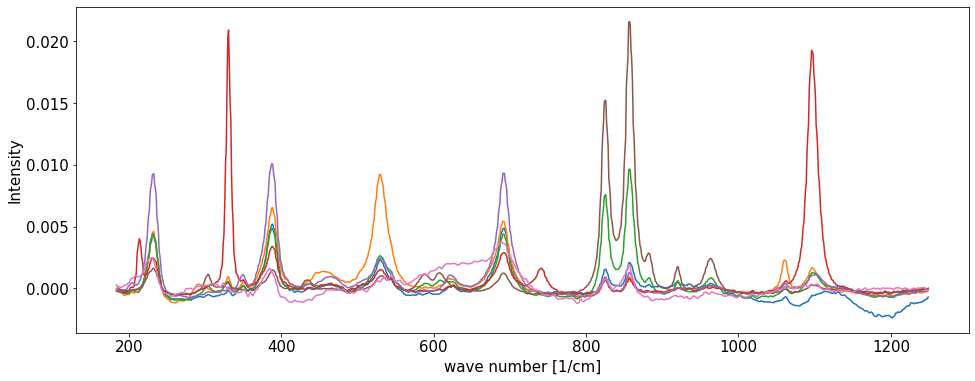

In [7]:
raman_plot()
for temp in np.unique(labels):
    plt.plot(data.wn,data[str(int(temp))])

# FIT
Per trovare i materiali che compongono i cluster scegliamo di **non eseguire un fit su ogni spettro all'interno di un determinato cluster**, ma **procediamo mediando su tutti gli spettri presenti nei singoli cluster e fittiamo sul risultato della media.** Questo ci permette di ridurre sensibilmente il rumore, sebbene modifichi parzialmente i picchi.

Per ogni cluster effettuiamo una regressione lineare estrappolando i coefficienti che poi, normalizzati, costituiranno le abbondanze dei cluster. Per calcolare quest'ultime abbiamo chiaramente pesato i cluster in base al numero di spettri che sono costituiti.

 La regressione è del tipo $C = \sum \alpha_{i}P_{i} + c$ dove i $P_{i}$ sono gli spettri puri, $C$ il centroide del cluster.

Il risultato dei fit è il seguente.

![final_FIT.](./figures/final_FIT.png)

ed infine dai coeficineti pesati per il numero di elementi per cluster e normalizzati otteniamo le abbondanze. Le importiamo dall'output dell'FIT automatizzato con make e mostriamo i materiali con un'abbondanza maggiore dell' 5%. **Questo è il risultato finale**.

In [8]:
abb_table = pd.read_csv("../repo_raman/data/abb_table.csv")
abb_table.drop(labels='Unnamed: 0',inplace=True,axis=1)
abb_table[abb_table['abbundances']>0.05]

,names,abbundances
0,Chrysotile,0.401873
1,Dwornikite,0.130816
2,Forsterite,0.129330
